In [15]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Data Prep

In [16]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32)) # convert to tensor
y = torch.from_numpy(y_numpy.astype(np.float32)) # convert to tensor

y = y.view(y.shape[0], 1) # reshape y to be a column vector

n_samples, n_features = X.shape
print(n_samples, n_features)

100 1


Model

In [17]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

Loss and Optimizer

In [18]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=learning_rate)

Training Loop

In [19]:
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_predicted = model(X) # make prediction
    loss = criterion(y_predicted, y) # calculate loss
    
    # Backward pass - calculate gradients
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item()}')

epoch: 10, loss = 4310.21240234375
epoch: 20, loss = 3215.289306640625
epoch: 30, loss = 2423.74267578125
epoch: 40, loss = 1850.8677978515625
epoch: 50, loss = 1435.81982421875
epoch: 60, loss = 1134.8258056640625
epoch: 70, loss = 916.3485107421875
epoch: 80, loss = 757.634521484375
epoch: 90, loss = 642.2481079101562
epoch: 100, loss = 558.3025512695312


Plot

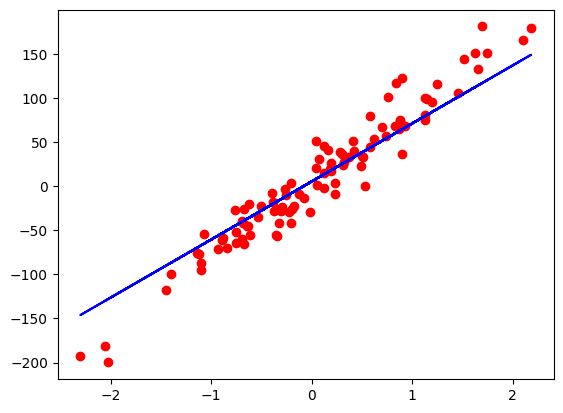

In [20]:
# detach() to get a numpy array
# model(X) is a tensor, we need to detach it and convert it to numpy array
predicted = model(X).detach().numpy() 
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()